In [1]:
import pandas as pd
import numpy as np

schools_data = pd.read_csv('../shared_data_read_only/Education-Data/2023-2024 Master School List (20231003).csv')
schools_data.head()

enroll_data = pd.read_csv('../shared_data_read_only/Education-Data/2023-2024 Enrollment & Demographics.csv')

mat_data = pd.read_csv('../shared_data_read_only/Education-Data/SDP_College_Matriculation_2021-2022.csv')

grad_data = pd.read_csv('../shared_data_read_only/Education-Data/SDP_Graduation_Rates_School_S_2023-02-15.csv')

attendance_data = pd.read_csv('../shared_data_read_only/Education-Data/Student_ADA_Yearly.csv')

In [2]:
final_zips = [19121, 19124, 19132, 19133, 19134]

new_df = pd.DataFrame()

for zips in final_zips:
    zip_df = schools_data.loc[schools_data['Zip Code'] == zips]
    zip_df = zip_df.loc[zip_df['Grade 9'] == 1]

    zip_schools = zip_df['ULCS Code'].to_numpy()
    
    enroll_data_t = enroll_data.loc[enroll_data['ulcscode'].isin(zip_schools)]
    enroll_data_t = enroll_data_t.loc[enroll_data_t['GradeLevel'].str.contains('All Grades')]
    
    enroll_data_t = enroll_data_t[["Sector", 'ulcscode', "SchoolName", "StudentEnrollment", "BlackAfricanAmericanPCT", "HispanicPCT", "CEPEconomicallyDisadvantagedRate"]]

    enroll_data_t.loc[len(enroll_data_t.index)] = ['N/A', 'N/A', 'Average', enroll_data_t['StudentEnrollment'].mean(), enroll_data_t['BlackAfricanAmericanPCT'].mean(), enroll_data_t['HispanicPCT'].mean(), enroll_data_t['CEPEconomicallyDisadvantagedRate'].mean()]
    enroll_data_t.loc[len(enroll_data_t.index)] = ['N/A', 'N/A', 'Median', enroll_data_t['StudentEnrollment'].median(), enroll_data_t['BlackAfricanAmericanPCT'].median(), enroll_data_t['BlackAfricanAmericanPCT'].median(), enroll_data_t['CEPEconomicallyDisadvantagedRate'].median()]
    enroll_data_t.insert(1, "Zip Code", [zips] * len(enroll_data_t), True)
    
    enroll_data_t.round(2)
    new_df = pd.concat([new_df, enroll_data_t], ignore_index=True)


In [3]:
new_df.insert(8, 'Matriculation Rate', [np.NaN] * len(new_df))

for i in range(len(new_df)):
    school = new_df.iloc[i, 2]
    if school == 'N/A': continue
    mat_df = mat_data.loc[mat_data['ULCS Code'] == school]
    if mat_df.empty: continue
    new_df.at[i, 'Matriculation Rate'] = mat_df.iloc[0, 4]

new_df

,Sector,Zip Code,ulcscode,SchoolName,StudentEnrollment,BlackAfricanAmericanPCT,HispanicPCT,CEPEconomicallyDisadvantagedRate,Matriculation Rate
0,Alternative,19121,2310,Achieve Academy,50.000000,92.0000,8.00000,100.000,NaN
1,Alternative,19121,3510,El Centro de Estudiantes (Big Picture),100.000000,52.0000,36.00000,1.600,NaN
2,District,19121,4030,High School of Engineering and Science,843.000000,58.9600,11.98000,92.430,78.79
3,District,19121,4140,Strawberry Mansion High School,249.000000,92.3700,2.81000,100.000,0.00
4,District,19121,5180,Vaux High School: A Big Picture,305.000000,89.5100,5.57000,1.050,36.17
5,Alternative,19121,8080,Excel Academy North,208.000000,91.8300,3.37000,100.000,NaN
6,Alternative,19121,8860,One Bright Ray Mansion,105.000000,87.6200,10.48000,100.000,NaN
7,Alternative,19121,8870,One Bright Ray Mansion Evening,79.000000,88.6100,10.13000,0.000,NaN
8,N/A,19121,N/A,Average,242.375000,81.6125,11.04250,61.885,NaN
9,N/A,19121,N/A,Median,208.000000,88.6100,88.61000,92.430,NaN


In [4]:
final_schools = []

for i in range(len(new_df)):
    school = new_df.iloc[i, 2]
    if school == 'N/A': continue
    final_schools.append(school)

grad_df = grad_data.loc[grad_data['schoolid_ulcs'].isin(final_schools)]
grad_df = grad_df.loc[grad_df['rate_type'] == '4-Year Graduation Rate']
focus_rows = ['All Students', 'Economically Disadvantaged', 'Black/African American', 'Hispanic/Latino']
grad_df = grad_df.loc[grad_df['subgroup'].isin(focus_rows)]


In [5]:
new_df.insert(9, 'Grad Rate', [np.NaN] * len(new_df))
new_df.insert(10, 'Grad Rate for Economically Disadvantaged Students', [np.NaN] * len(new_df))
new_df.insert(11, 'Grad Rate for Black/African American Students', [np.NaN] * len(new_df))
new_df.insert(12, 'Grad Rate for Hispanic/Latino Students', [np.NaN] * len(new_df))

for school in final_schools:
    temp_df = grad_df.loc[grad_df['schoolid_ulcs'] == school]
    
    all_df = temp_df.loc[temp_df['subgroup'] == 'All Students']
    all_df = all_df[all_df['score'] != 's']
    all_df['score'] = all_df['score'].astype(float)
    
    econ_df = temp_df.loc[temp_df['subgroup'] == 'Economically Disadvantaged']
    econ_df = econ_df[econ_df['score'] != 's']
    econ_df['score'] = econ_df['score'].astype(float)
    
    eth_df = temp_df.loc[temp_df['subgroup'] == 'Black/African American']
    eth_df = eth_df[eth_df['score'] != 's']
    eth_df['score'] = eth_df['score'].astype(float)
    
    eth2_df = temp_df.loc[temp_df['subgroup'] == 'Hispanic/Latino']
    eth2_df = eth_df[eth_df['score'] != 's']
    eth2_df['score'] = eth2_df['score'].astype(float)
    
    row_index = new_df.index.get_loc(new_df[new_df['ulcscode'] == school].index[0])
    new_df.at[row_index, 'Grad Rate'] = all_df['score'].mean()
    new_df.at[row_index, 'Grad Rate for Economically Disadvantaged Students'] = econ_df['score'].mean()
    new_df.at[row_index, 'Grad Rate for Black/African American Students'] = eth_df['score'].mean()
    new_df.at[row_index, 'Grad Rate for Hispanic/Latino Students'] = eth2_df['score'].mean()
    
new_df


,Sector,Zip Code,ulcscode,SchoolName,StudentEnrollment,BlackAfricanAmericanPCT,HispanicPCT,CEPEconomicallyDisadvantagedRate,Matriculation Rate,Grad Rate,Grad Rate for Economically Disadvantaged Students,Grad Rate for Black/African American Students,Grad Rate for Hispanic/Latino Students
0,Alternative,19121,2310,Achieve Academy,50.000000,92.0000,8.00000,100.000,NaN,44.345714,40.760000,48.415000,48.415000
1,Alternative,19121,3510,El Centro de Estudiantes (Big Picture),100.000000,52.0000,36.00000,1.600,NaN,21.747778,22.478889,21.942500,21.942500
2,District,19121,4030,High School of Engineering and Science,843.000000,58.9600,11.98000,92.430,78.79,97.477778,97.155556,98.055556,98.055556
3,District,19121,4140,Strawberry Mansion High School,249.000000,92.3700,2.81000,100.000,0.00,45.828750,40.313333,43.672000,43.672000
4,District,19121,5180,Vaux High School: A Big Picture,305.000000,89.5100,5.57000,1.050,36.17,85.250000,NaN,85.650000,85.650000
5,Alternative,19121,8080,Excel Academy North,208.000000,91.8300,3.37000,100.000,NaN,36.064444,40.905714,40.568571,40.568571
6,Alternative,19121,8860,One Bright Ray Mansion,105.000000,87.6200,10.48000,100.000,NaN,15.252500,15.090000,14.327500,14.327500
7,Alternative,19121,8870,One Bright Ray Mansion Evening,79.000000,88.6100,10.13000,0.000,NaN,40.100000,NaN,38.162500,38.162500
8,N/A,19121,N/A,Average,242.375000,81.6125,11.04250,61.885,NaN,NaN,NaN,NaN,NaN
9,N/A,19121,N/A,Median,208.000000,88.6100,88.61000,92.430,NaN,NaN,NaN,NaN,NaN


In [6]:
attendance_df = attendance_data.loc[attendance_data['ULCS Code'].isin(final_schools)]
new_df.insert(13, 'Attendance Rate', [np.NaN] * len(new_df))

for school in final_schools:
    temp_df = attendance_data.loc[attendance_data['ULCS Code'] == school]
    row_index = new_df.index.get_loc(new_df[new_df['ulcscode'] == school].index[0])
    new_df.at[row_index, 'Attendance Rate'] = temp_df['Average Daily Attendance (YTD)'].mean()


In [9]:
for zips in final_zips:
    temp_df = new_df.loc[new_df['Zip Code'] == zips]
    
    avg_row_index = new_df.index.get_loc(new_df[(new_df['Zip Code'] == zips) & (new_df['SchoolName'] == 'Average')].index[0])
    med_row_index = new_df.index.get_loc(new_df[(new_df['Zip Code'] == zips) & (new_df['SchoolName'] == 'Median')].index[0])
    
    new_df.at[avg_row_index, 'Matriculation Rate'] = temp_df['Matriculation Rate'].mean()
    new_df.at[avg_row_index, 'Grad Rate'] = temp_df['Grad Rate'].mean()
    new_df.at[avg_row_index, 'Grad Rate for Economically Disadvantaged Students'] = temp_df['Grad Rate for Economically Disadvantaged Students'].mean()
    new_df.at[avg_row_index, 'Grad Rate for Black/African American Students'] = temp_df['Grad Rate for Black/African American Students'].mean()
    new_df.at[avg_row_index, 'Grad Rate for Hispanic/Latino Students'] = temp_df['Grad Rate for Hispanic/Latino Students'].mean()
    new_df.at[avg_row_index, 'Attendance Rate'] = temp_df['Attendance Rate'].mean()
    
    new_df.at[avg_row_index, 'Matriculation Rate'] = temp_df['Matriculation Rate'].median()
    new_df.at[med_row_index, 'Grad Rate'] = temp_df['Grad Rate'].median()
    new_df.at[med_row_index, 'Grad Rate for Economically Disadvantaged Students'] = temp_df['Grad Rate for Economically Disadvantaged Students'].median()
    new_df.at[med_row_index, 'Grad Rate for Black/African American Students'] = temp_df['Grad Rate for Black/African American Students'].median()
    new_df.at[med_row_index, 'Grad Rate for Hispanic/Latino Students'] = temp_df['Grad Rate for Hispanic/Latino Students'].median()
    new_df.at[med_row_index, 'Attendance Rate'] = temp_df['Attendance Rate'].median()

new_df

/home/jupyter-user-3/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/jupyter-user-3/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Sector,Zip Code,ulcscode,SchoolName,StudentEnrollment,BlackAfricanAmericanPCT,HispanicPCT,CEPEconomicallyDisadvantagedRate,Matriculation Rate,Grad Rate,Grad Rate for Economically Disadvantaged Students,Grad Rate for Black/African American Students,Grad Rate for Hispanic/Latino Students,Attendance Rate
0,Alternative,19121,2310,Achieve Academy,50.000000,92.0000,8.00000,100.000,NaN,44.345714,40.760000,48.415000,48.415000,NaN
1,Alternative,19121,3510,El Centro de Estudiantes (Big Picture),100.000000,52.0000,36.00000,1.600,NaN,21.747778,22.478889,21.942500,21.942500,NaN
2,District,19121,4030,High School of Engineering and Science,843.000000,58.9600,11.98000,92.430,78.790,97.477778,97.155556,98.055556,98.055556,95.930000
3,District,19121,4140,Strawberry Mansion High School,249.000000,92.3700,2.81000,100.000,0.000,45.828750,40.313333,43.672000,43.672000,77.306667
4,District,19121,5180,Vaux High School: A Big Picture,305.000000,89.5100,5.57000,1.050,36.170,85.250000,NaN,85.650000,85.650000,83.320000
5,Alternative,19121,8080,Excel Academy North,208.000000,91.8300,3.37000,100.000,NaN,36.064444,40.905714,40.568571,40.568571,NaN
6,Alternative,19121,8860,One Bright Ray Mansion,105.000000,87.6200,10.48000,100.000,NaN,15.252500,15.090000,14.327500,14.327500,NaN
7,Alternative,19121,8870,One Bright Ray Mansion Evening,79.000000,88.6100,10.13000,0.000,NaN,40.100000,NaN,38.162500,38.162500,NaN
8,N/A,19121,N/A,Average,242.375000,81.6125,11.04250,61.885,37.245,47.700607,42.481854,48.186608,48.186608,84.991156
9,N/A,19121,N/A,Median,208.000000,88.6100,88.61000,92.430,NaN,43.815000,40.704167,43.284071,43.284071,83.320000


In [10]:
average_schools = new_df[new_df['SchoolName'].str.contains('Average', case=False)]
columns_to_show = ['Zip Code','StudentEnrollment', 'BlackAfricanAmericanPCT', 'HispanicPCT', 'CEPEconomicallyDisadvantagedRate', 'Matriculation Rate', 'Grad Rate', "Grad Rate for Economically Disadvantaged Students", "Grad Rate for Black/African American Students", 'Grad Rate for Hispanic/Latino Students', "Attendance Rate"]

# Select only the specified columns
selected_columns_df = average_schools[columns_to_show]
display(selected_columns_df)

,Zip Code,StudentEnrollment,BlackAfricanAmericanPCT,HispanicPCT,CEPEconomicallyDisadvantagedRate,Matriculation Rate,Grad Rate,Grad Rate for Economically Disadvantaged Students,Grad Rate for Black/African American Students,Grad Rate for Hispanic/Latino Students,Attendance Rate
8,19121,242.375000,81.6125,11.04250,61.885,37.245,47.700607,42.481854,48.186608,48.186608,84.991156
18,19124,914.500000,35.4950,51.49125,60.000,24.780,46.084118,45.867469,49.683210,49.683210,80.556667
23,19132,464.666667,91.4000,5.40000,100.000,25.950,53.712361,56.195179,55.410714,55.410714,81.170000
26,19133,261.000000,41.3800,52.11000,0.610,NaN,36.971111,33.393333,37.277500,37.277500,NaN
29,19134,591.000000,43.1500,44.84000,100.000,20.250,83.617778,83.396250,86.307778,86.307778,80.486667


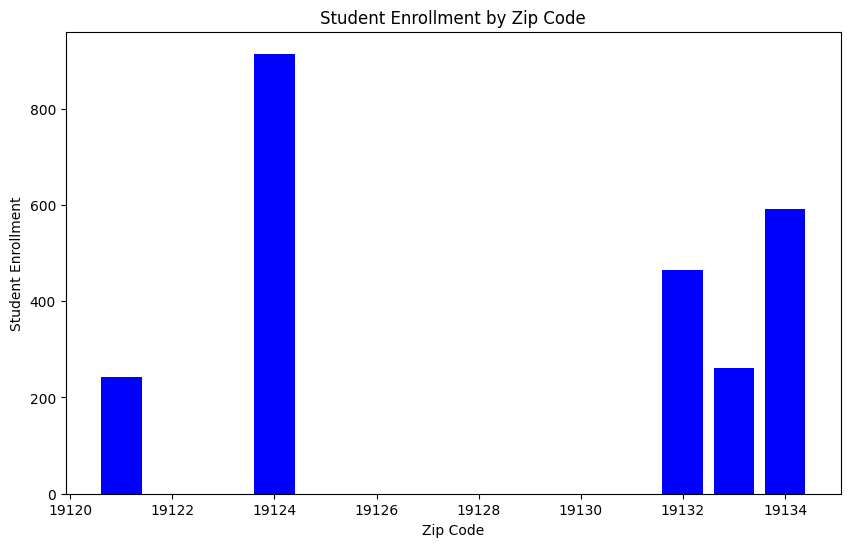

<Figure size 1000x600 with 0 Axes>

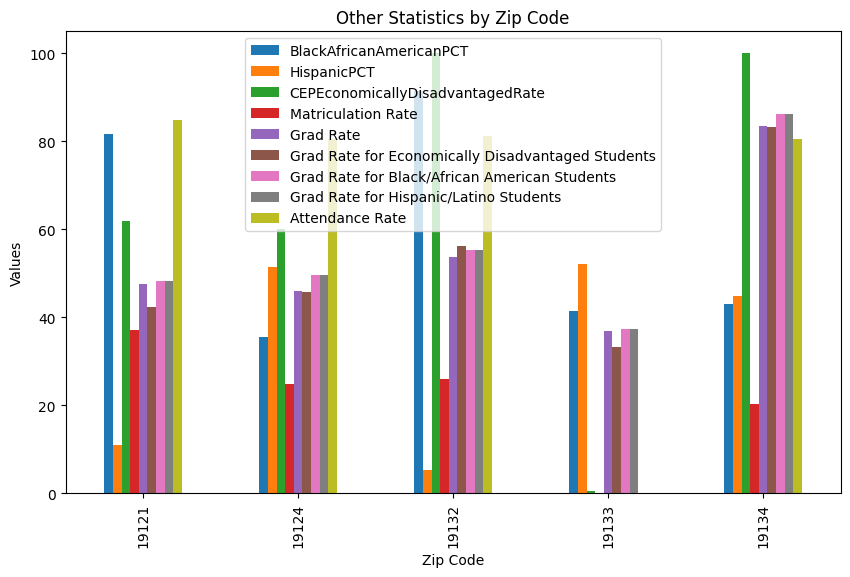

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot Student Enrollment separately
plt.figure(figsize=(10, 6))
plt.bar(selected_columns_df['Zip Code'], selected_columns_df['StudentEnrollment'], color='blue')
plt.xlabel('Zip Code')
plt.ylabel('Student Enrollment')
plt.title('Student Enrollment by Zip Code')
plt.show()

plt.figure(figsize=(10, 6))
# Set 'Zip Code' as index
selected_columns_df.set_index('Zip Code', inplace=True)
# Plot
selected_columns_df.drop(columns=['StudentEnrollment']).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Zip Code')
plt.ylabel('Values')
plt.title('Other Statistics by Zip Code')
plt.show()
